In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import expon
from scipy.stats import uniform
from scipy.stats import norm

%matplotlib inline

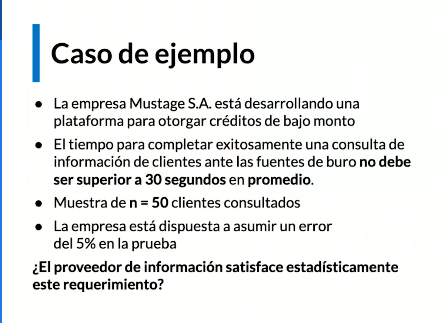

In [2]:
from IPython.display import Image
Image("caso_ejemplo_clase16:prueba_hipotesis.png")

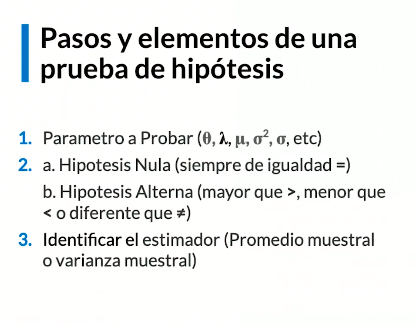

In [3]:
Image("pasos_de_prueba_hipotesis1.png")

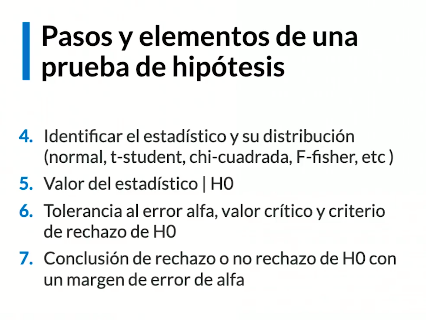

In [4]:
Image("pasos_de_prueba_hipotesis2.png")


In [5]:
muestra = [42, 35, 29, 45, 41, 57, 54, 47, 48, 56, 47, 35, 52, 31, 52, 55, 57, 58, 26, 29, 32, 37, 32, 34, 48, 20, 48, 51, 27, 24, 39, 40, 31, 34, 23, 24, 41, 58, 44, 48, 31, 23, 27, 55, 43, 47, 30, 57, 38, 51]

In [6]:
len(muestra)

50

In [7]:
#hipotesis
media, var, skew, kurt = expon.stats(scale = 30, moments= 'mvsk')
media, var, skew, kurt

(array(30.), array(900.), array(2.), array(6.))

In [8]:
#paso 1: parametro lambda
#paso 2: crear hipotesis, nula y alterna (mu)

mu = 30 
mu > 30

#Paso 3: mejor estimador
#Estimador
#Distribucion

promedio = np.mean(muestra)
promedio


40.66

In [9]:
#Paso 5
z = (promedio - mu)/np.sqrt(var/50)
z

2.5125860958161983

In [10]:
#paso 6 : 

alpha = 0.05

#criterios de rechazo 

data_norm = norm.rvs(size = 1000000)
data_norm

array([-0.01580285,  1.50256716, -2.05643504, ...,  0.5505591 ,
        0.73015478,  0.77517759])

Text(0.5, 1.0, 'Distribucion normal')

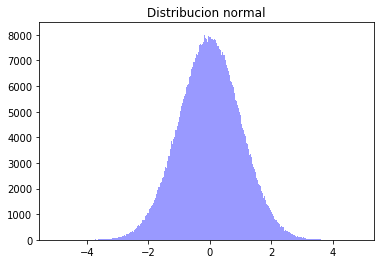

In [11]:
ax = sns.distplot(data_norm, bins=500, kde=False, color='blue')
ax.set_title('Distribucion normal')

In [12]:
valor_critico = norm.ppf(1-alpha, loc = 0, scale = 1) #Si alpha es la probabilidad de error, 1-alpha es la de no error o valor de tolerancia
valor_critico

1.6448536269514722

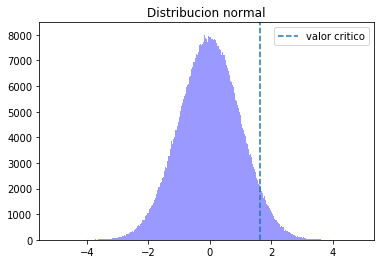

In [13]:
ax = sns.distplot(data_norm, bins=500, kde=False, color='blue')
ax.set_title('Distribucion normal')
ax.axvline(x = valor_critico, linestyle = '--', label = 'valor critico')
ax.legend() 
#a partir de la linea punteada se acumula una probabilidad del 5% de error

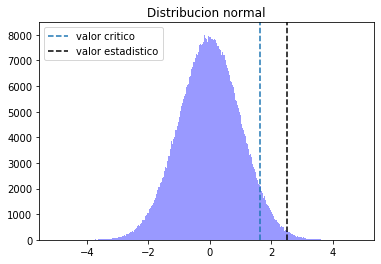

In [14]:
ax = sns.distplot(data_norm, bins=500, kde=False, color='blue')
ax.set_title('Distribucion normal')
ax.axvline(x = valor_critico, linestyle = '--', label = 'valor critico')
ax.axvline(x = z, linestyle = '--', label = 'valor estadistico', color='k')
ax.legend() 
#todo lo que este despues de los valores de la linea del valor critico es poco probable bajos los valores del estimador, por lo tanto se estima que mu no tiene valor igual a 30 y se confirma que probablemente tenga valor <30

In [15]:
#PROBANDO ERRORES ESTADISTICO
mu1 = 37
mu2 = 42

promedio = np.mean(muestra)

desv = 2

z_1 = (promedio - mu1)/desv
z_2 = (promedio - mu2)/desv

In [16]:
data1 = norm.rvs(loc =mu1,scale = desv,size = 10000000)
data2 = norm.rvs(loc =mu2,scale = desv,size = 10000000)


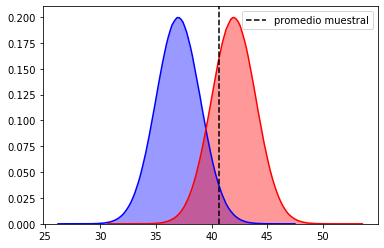

In [17]:
ax = sns.distplot(data1, bins=500, kde=True, color='blue')
ax = sns.distplot(data2, bins=500, kde=True, color='red')
ax.axvline(x = promedio, c='k', linestyle ='--', label = 'promedio muestral')
ax.legend()

In [18]:
#error tipo 1 : rechazar h0 cuando este es verdadero
p_prom_mu1 = norm.cdf(z_1)
1-p_prom_mu1 #03%

0.03362496941962845

In [21]:
#error tipo 2: probabilidad de no rechazar h0 cuando esta es falsa
p_prom_mu2 = norm.cdf(z_2)
p_prom_mu2

0.2514288950953095